In [10]:
# Import the Lib
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [11]:
#load the data
data = pd.read_csv("car_data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
#getting some info about data & also check null data
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
#Counting data in column (Fuel_Type,Seller_Type,Transmission)
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [14]:
#handle Cat data
lb = LabelEncoder()
data["Fuel_Type"] = lb.fit_transform(data["Fuel_Type"])
data["Seller_Type"] = lb.fit_transform(data["Seller_Type"])
data["Transmission"] = lb.fit_transform(data["Transmission"])
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [15]:
#Features & target
features = data[["Year","Present_Price","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner"]]
target = data[["Selling_Price"]]

In [16]:
#Splitting training & test data
x_train,x_test,y_train,y_test = train_test_split(features,target, test_size = 0.1, random_state=2)

In [19]:
# model creation
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
# performance testing
s1 = model.score(x_train, y_train)
s2 = model.score(x_test, y_test)
print("traing score ", round(s1*100, 2), "%")
print("testing_score ", round(s2*100, 2), "%")

traing score  87.99 %
testing_score  83.66 %


In [24]:
#Prediction on training data
training_data_prediction = model.predict(x_train)

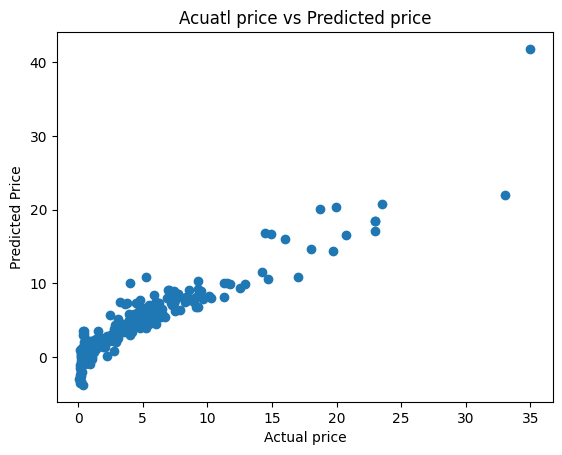

In [23]:
# visualize the actual price and predicted price
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Acuatl price vs Predicted price")
plt.show()

In [25]:
#Prediction on test data
testing_data_prediction = model.predict(x_test)

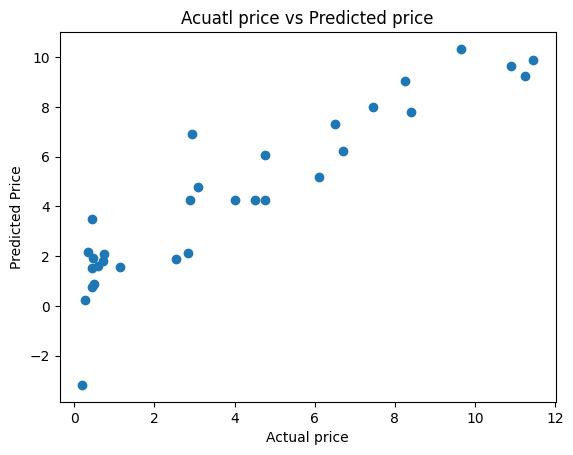

In [26]:
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Acuatl price vs Predicted price")
plt.show()

In [28]:
#model save
from pickle import*
f = open("CPP.pkl", "wb")
dump(model, f)
f.close()

In [29]:
print(data.Car_Name.value_counts())

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


In [40]:
#Model Use
from pickle import *
# Load the model from the pickle file
with open("CPP.pkl", "rb") as f:
    model = load(f)

# Example input for prediction
year = 2015
present_price = 6.5
kms_driven = 35000
fuel_type = 1  
seller_type = 0  
transmission = 0  
owner = 0

# Make a prediction
input_data = [[year, present_price, kms_driven, fuel_type, seller_type, transmission, owner]]
predicted_price = model.predict(input_data)

# Display the prediction
print("Predicted Selling Price:", round(predicted_price[0][0], 2), "Lakhs")


Predicted Selling Price: 7.86 Lakhs


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
data["Car_Name"].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 